In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Gender_Classification_Dataset (1).zip to Gender_Classification_Dataset (1).zip


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [12]:
!kaggle datasets download -d elakiricoder/gender-classification-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [14]:
!unzip /content/gender-classification-dataset.zip

unzip:  cannot find or open /content/gender-classification-dataset.zip, /content/gender-classification-dataset.zip.zip or /content/gender-classification-dataset.zip.ZIP.


In [15]:
!ls /content


'Gender_Classification_Dataset (1).zip'   sample_data


In [16]:
!unzip "Gender_Classification_Dataset (1).zip"

Archive:  Gender_Classification_Dataset (1).zip
  inflating: gender_classification_v7.csv  


In [17]:
!ls

'Gender_Classification_Dataset (1).zip'   sample_data
 gender_classification_v7.csv


In [18]:
import pandas as pd
df = pd.read_csv("gender_classification_v7.csv")
df.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [19]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [21]:
df.dtypes

,0
long_hair,int64
forehead_width_cm,float64
forehead_height_cm,float64
nose_wide,int64
nose_long,int64
lips_thin,int64
distance_nose_to_lip_long,int64
gender,object


In [22]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [23]:
df.nunique()

,0
long_hair,2
forehead_width_cm,42
forehead_height_cm,21
nose_wide,2
nose_long,2
lips_thin,2
distance_nose_to_lip_long,2
gender,2


In [24]:
df.duplicated().sum()

np.int64(1768)

In [25]:
df=df.drop_duplicates()

In [26]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [30]:
df["gender"].value_counts()


,count
gender,
Male,1783
Female,1450


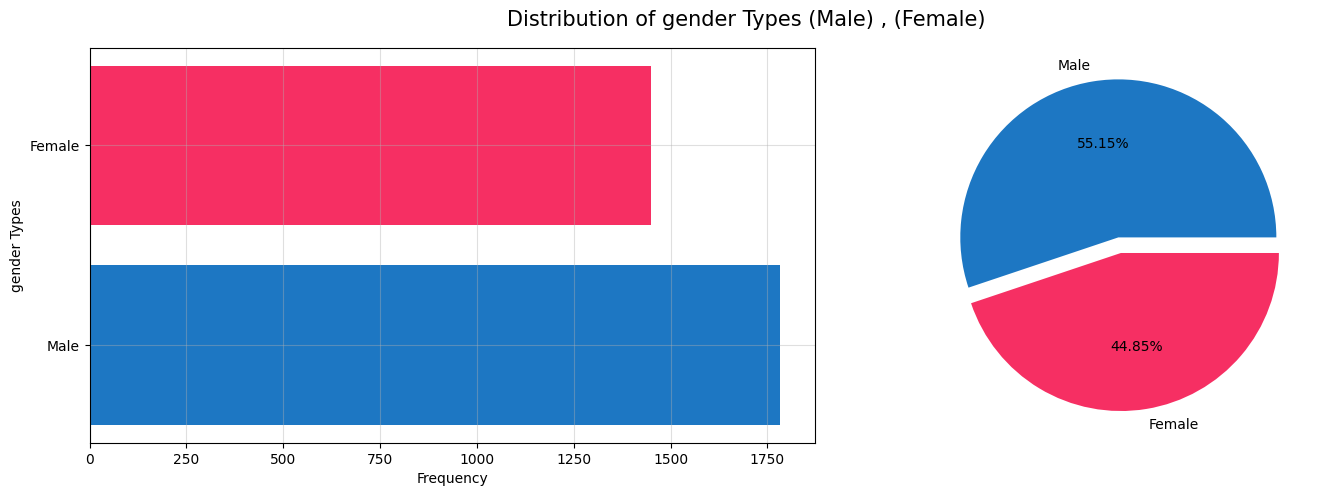

In [31]:
types = df['gender'].value_counts()
colors = ['#1D77C3', '#F62F63']

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('gender Types')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of gender Types (Male) , (Female)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

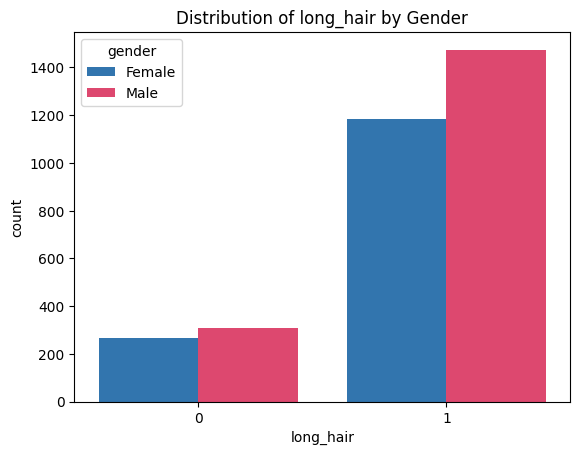

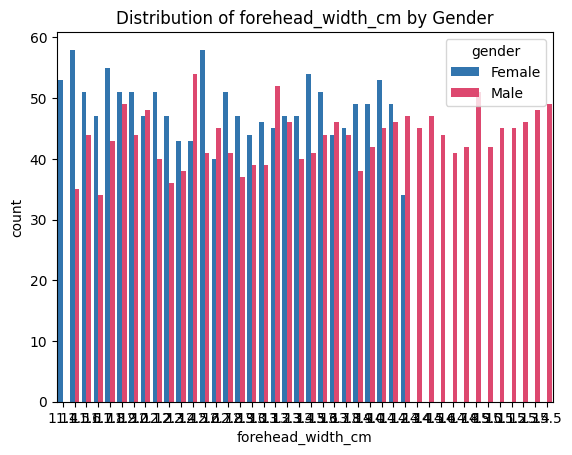

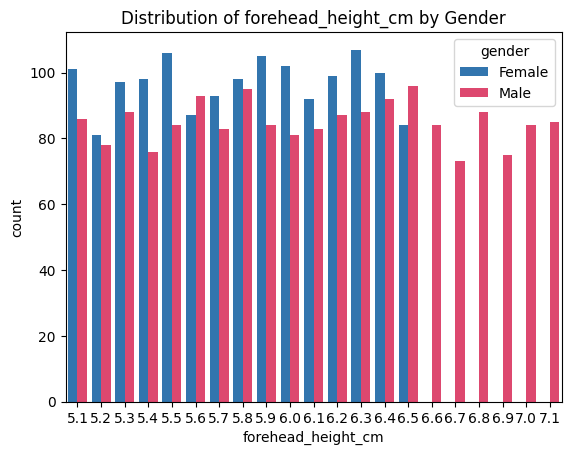

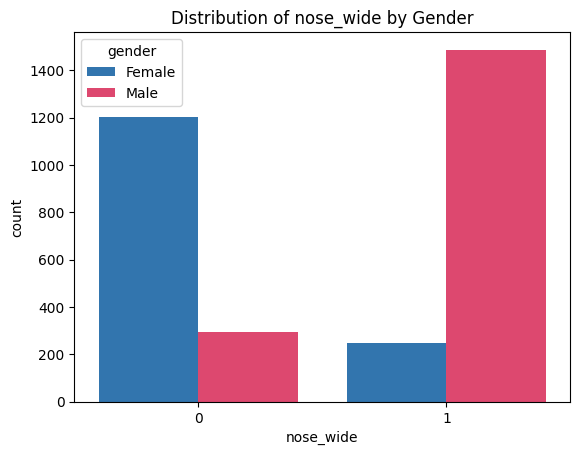

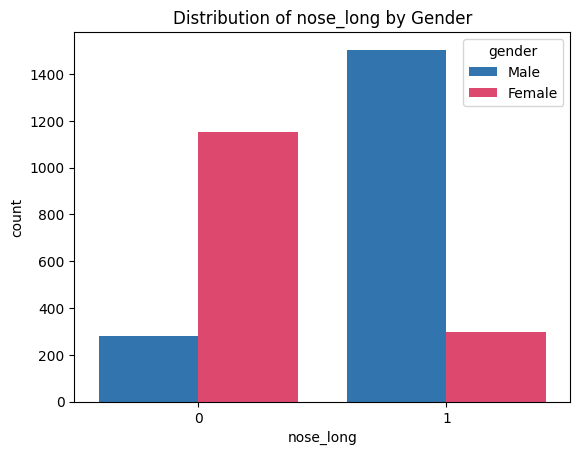

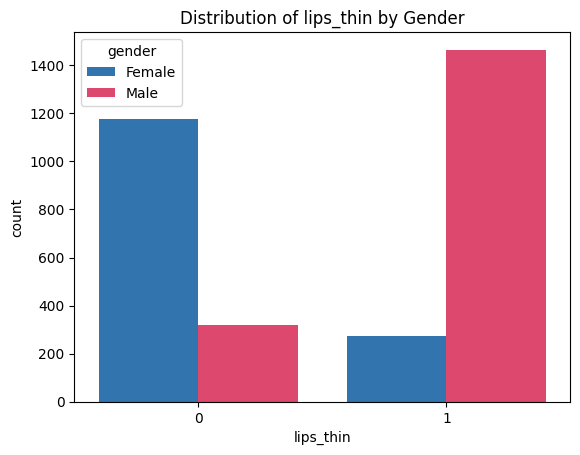

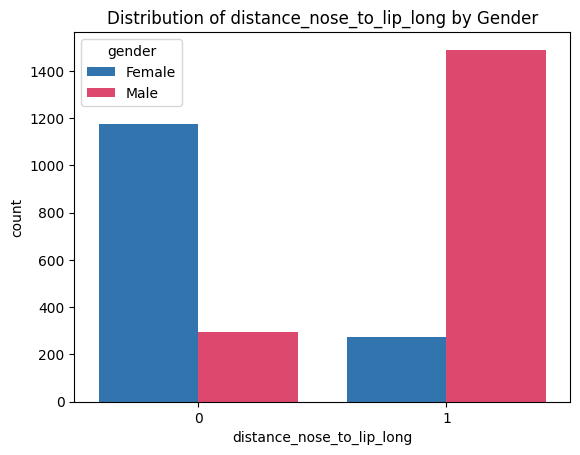

In [32]:
# Create a count plot for each column
for col in df.columns[:-1]:
    # Change the color to lightblue and pink
    sns.countplot(x=col, hue='gender', data=df, palette=['#1D77C3', '#F62F63'])

    # Set the title
    plt.title(f"Distribution of {col} by Gender")

    # Display the plot
    plt.show()

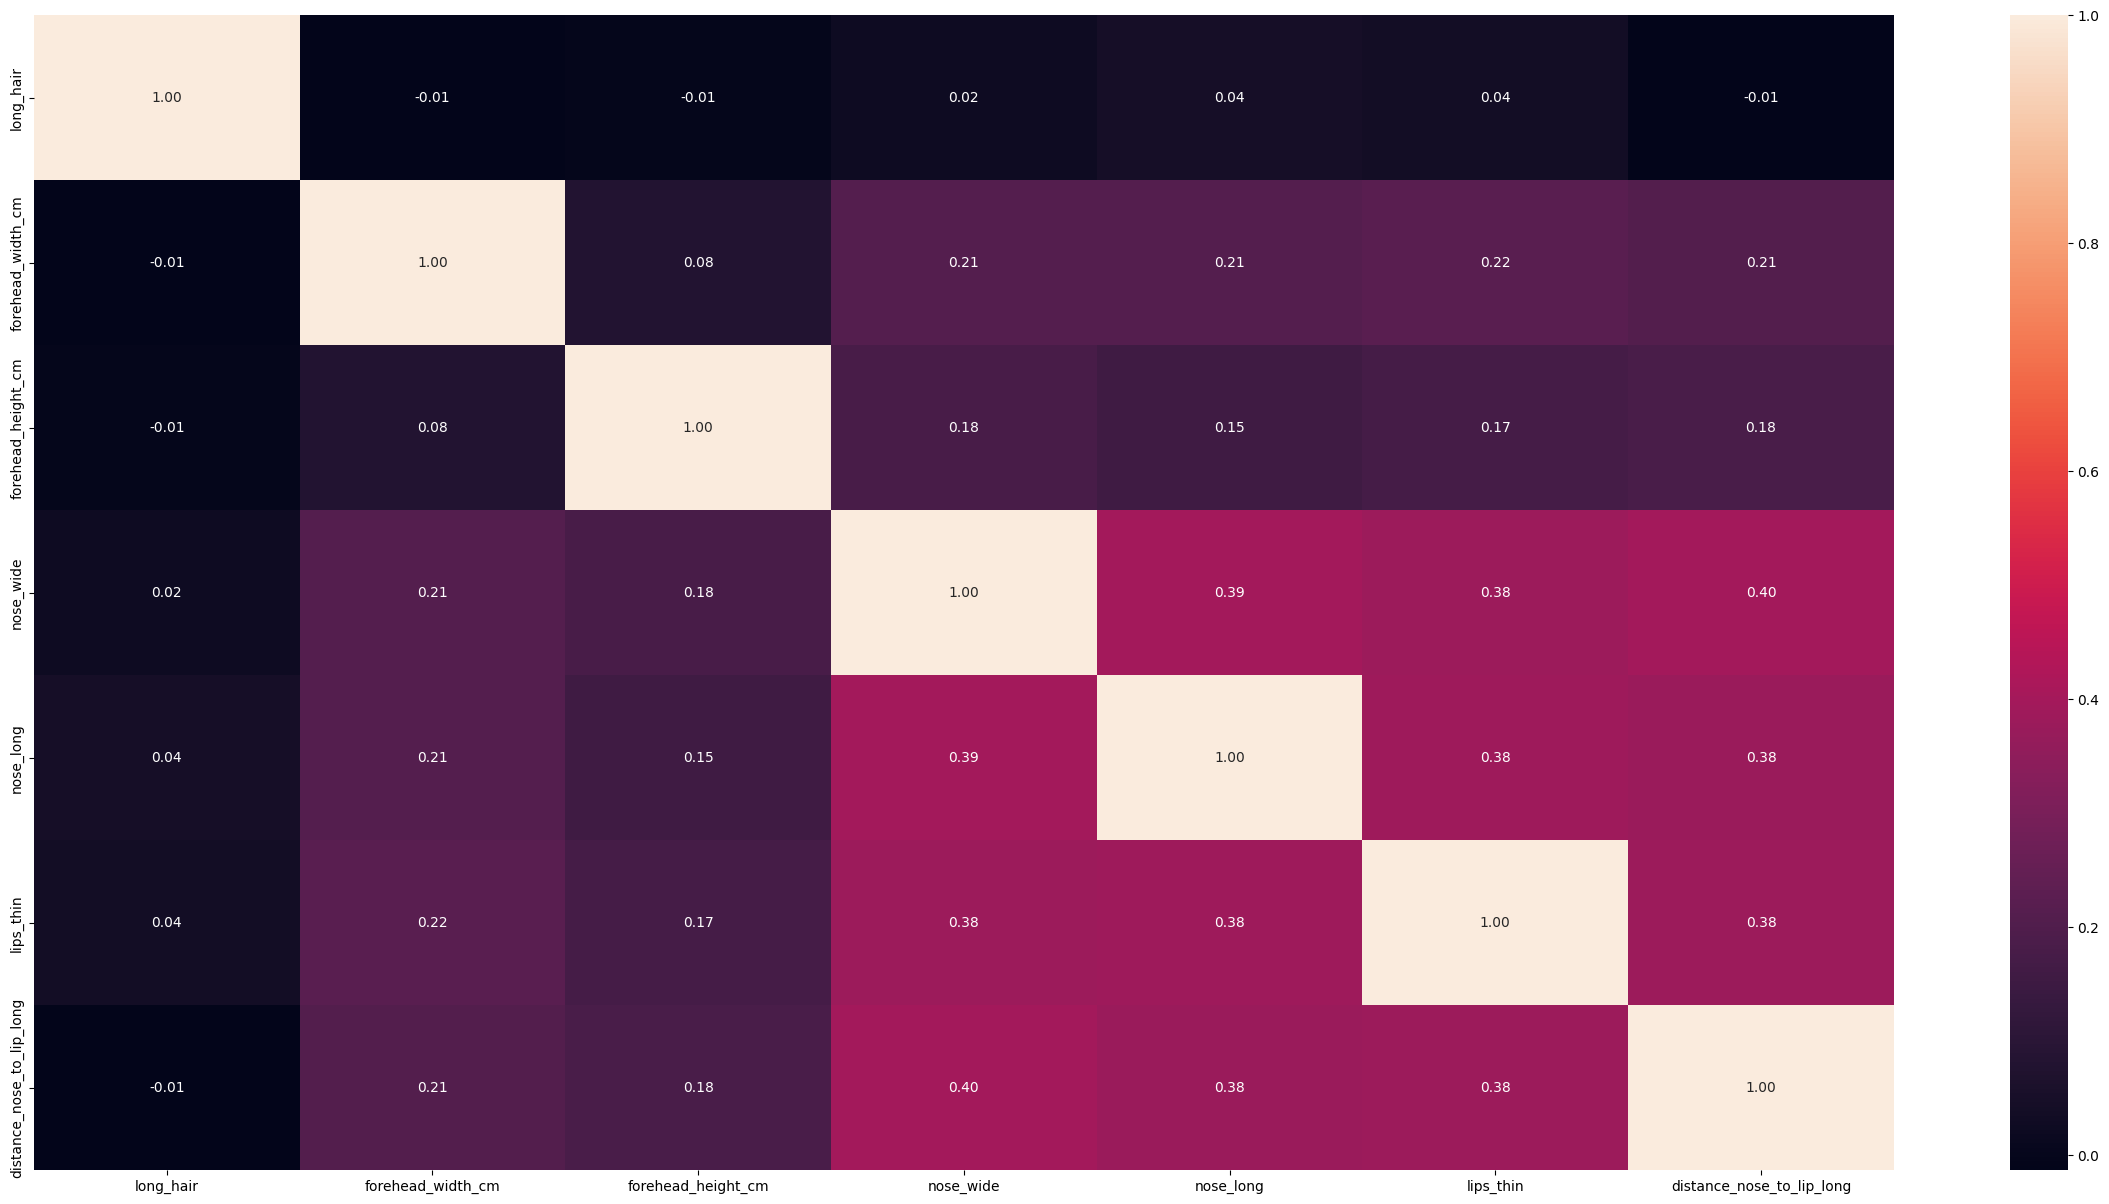

In [34]:
c_list = df.columns
plt.figure(figsize=(30, 15))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")
plt.show()

In [35]:
new_df=df
x = new_df[new_df.columns[:-1]]
y = new_df['gender']

In [36]:

# Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42 )

In [37]:
le =LabelEncoder()
le.fit(new_df['gender'])

LabelEncoder()

In [38]:
new_df['gender']=le.transform(new_df['gender'])
new_df=new_df.drop('gender',axis=1)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 202.1 KB


In [40]:
scaler = MinMaxScaler()
columns = new_df.columns
new_df = pd.DataFrame(scaler.fit_transform(new_df))
new_df.columns = columns
new_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,0.097561,0.50,1.0,0.0,1.0,1.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0
4,1.0,0.512195,0.40,0.0,0.0,0.0,0.0


In [41]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [42]:
# Model evaluation on train data
lr_pred_train = lr_model.predict(x_train)
lr_accuracy_train = accuracy_score(y_train, lr_pred_train)
print(f"Train Accuracy: {round(lr_accuracy_train * 100,2)}%")

Train Accuracy: 95.01%


In [43]:
# Model evaluation on test data
lr_y_pred_test = lr_model.predict(x_test)
lr_accuracy_test = accuracy_score(y_test, lr_y_pred_test)
print(f"Test Accuracy: {round(lr_accuracy_test * 100,2)}%")

Test Accuracy: 95.98%


Classification report: 
              precision    recall  f1-score   support

      Female       0.95      0.96      0.96       308
        Male       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



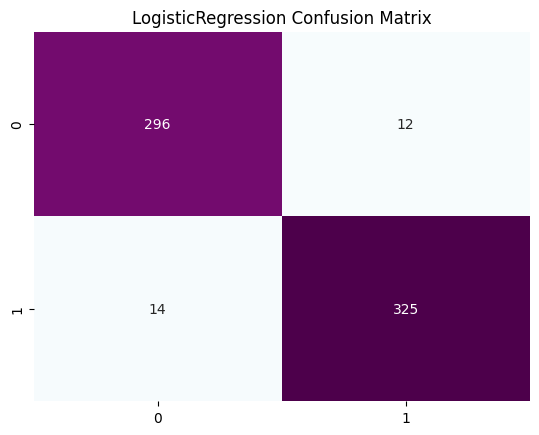

In [44]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, lr_y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False,)
plt.title('LogisticRegression Confusion Matrix');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, lr_y_pred_test)))

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# Model evaluation on train data
knn_y_pred_train = knn_model.predict(x_train)
knn_accuracy_train = accuracy_score(y_train, knn_y_pred_train)
print(f"Train Accuracy: {round(knn_accuracy_train * 100,2)}%")

Train Accuracy: 97.29%


In [47]:
# Model evaluation on test data
knn_pred_test = knn_model.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print(f"Test Accuracy: {round(knn_accuracy_test * 100,2)}%")

Test Accuracy: 94.13%


Classification report: 
              precision    recall  f1-score   support

      Female       0.92      0.95      0.94       308
        Male       0.96      0.93      0.94       339

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647



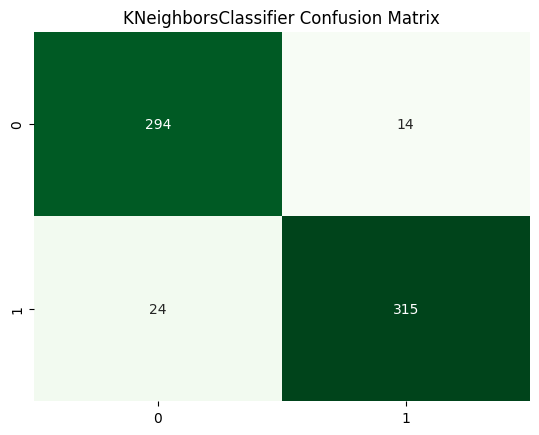

In [48]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, knn_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('KNeighborsClassifier Confusion Matrix');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, knn_pred_test)))

In [49]:
dt_model = tree.DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Model evaluation on train data
dty_pred_train = dt_model.predict(x_train)
dt_accuracy_train = accuracy_score(y_train, dty_pred_train)
print(f"Train Accuracy: {round(dt_accuracy_train * 100,2)}%")

Train Accuracy: 99.77%


In [51]:
# Model evaluation on test data
dt_y_pred_test = dt_model.predict(x_test)
dt_accuracy_test = accuracy_score(y_test, dt_y_pred_test)
print(f"Test Accuracy: {round(dt_accuracy_test * 100,2)}%")

Test Accuracy: 94.74%


Classification report: 
              precision    recall  f1-score   support

      Female       0.94      0.94      0.94       308
        Male       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



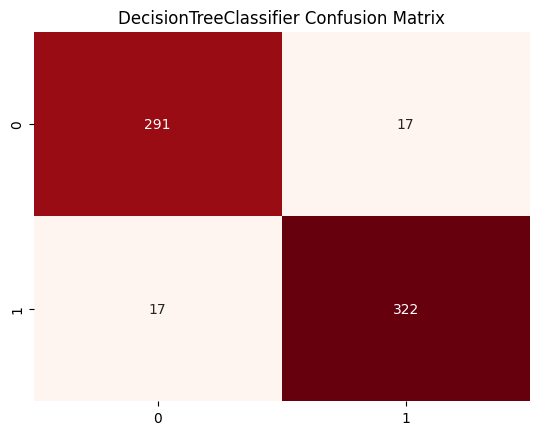

In [52]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, dt_y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('DecisionTreeClassifier Confusion Matrix');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, dt_y_pred_test)))

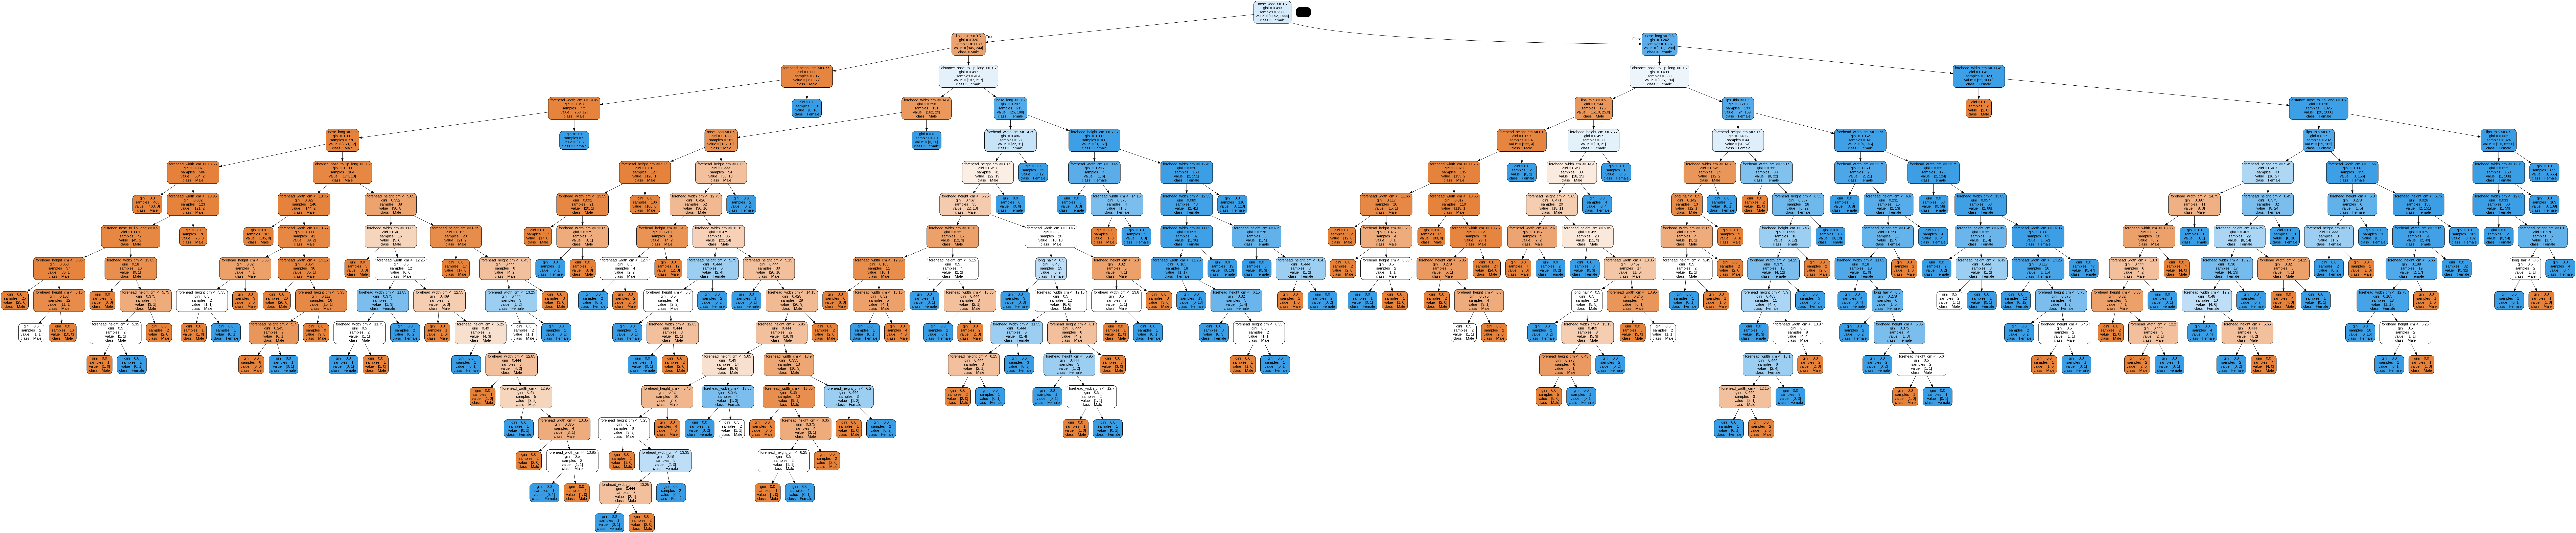

In [53]:
from IPython.display import Image
from pydotplus import graph_from_dot_data
# Export the decision tree to Graphviz format
dot_data = tree.export_graphviz(dt_model, out_file=None,
                          feature_names=x_train.columns,
                          filled=True,
                          rounded=True,
                          class_names=[str(i) for i in y_train.tolist()])
# Create a graph from the DOT data
graph = graph_from_dot_data(dot_data)

# Display the image in the notebook
Image(graph.create_png())

In [54]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Model evaluation on train data
rf_pred_train = rf_model.predict(x_train)
rf_accuracy_train = accuracy_score(y_train, rf_pred_train)
print(f"Train Accuracy: {round(rf_accuracy_train * 100,2)}%")

Train Accuracy: 99.77%


In [56]:
# Model evaluation on test data
rf_y_pred_test = rf_model.predict(x_test)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred_test)
print(f"Test Accuracy: {round(rf_accuracy_test * 100,2)}%")

Test Accuracy: 95.52%


Classification report: 
              precision    recall  f1-score   support

      Female       0.95      0.95      0.95       308
        Male       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



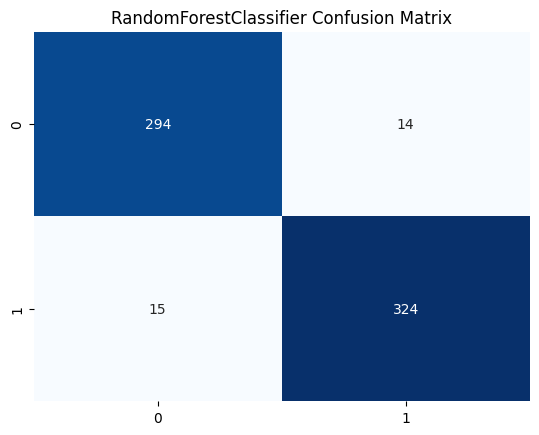

In [57]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('RandomForestClassifier Confusion Matrix');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, rf_y_pred_test)))

In [58]:
# Load the Iris dataset
iris = load_iris()

# Split the data into training and testing sets
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Create a Gradient Boosting classifier
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the classifier
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
# Model evaluation on train data
gbc_y_pred_train = gbc_model.predict(X_train)
gbc_accuracy_train = accuracy_score(y_train, gbc_y_pred_train)
print(f"Train Accuracy: {round(gbc_accuracy_train * 100,2)}%")

Train Accuracy: 100.0%


In [61]:
# Make predictions on the test set
gbc_y_pred_test = gbc_model.predict(X_test)
gbc_accuracy_test = accuracy_score(y_test, gbc_y_pred_test)
print(f"Test Accuracy: {round(gbc_accuracy_test * 100,2)}%")

Test Accuracy: 100.0%


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



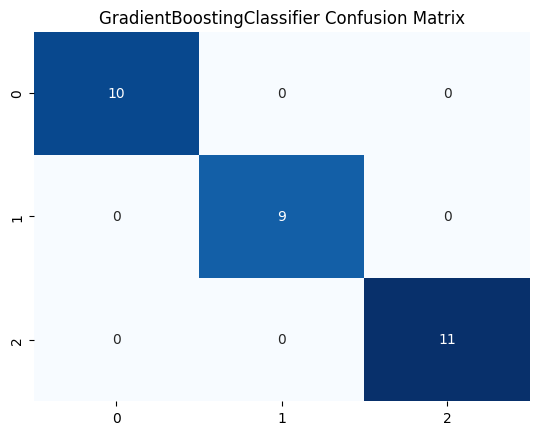

In [62]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, gbc_y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('GradientBoostingClassifier Confusion Matrix');
# Print classification report
print("Classification report:\n{}".format(classification_report(y_test, gbc_y_pred_test)))

In [63]:
model = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','DecisionTreeClassifier', 'RandomForestClassifier', 'G_BoostingClassifier'
    ],
    'Training Accuracy': [
        lr_accuracy_train, knn_accuracy_train, dt_accuracy_train, rf_accuracy_train, gbc_accuracy_train
    ],
    'Test Accuracy Score': [
       lr_accuracy_test, knn_accuracy_test, dt_accuracy_test, rf_accuracy_test, gbc_accuracy_test
    ]
})
model.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Test Accuracy Score
4,G_BoostingClassifier,1.000000,1.000000
3,RandomForestClassifier,0.997680,0.955178
2,DecisionTreeClassifier,0.997680,0.947450
1,K Nearest Neighbors,0.972931,0.941267
0,Logistic Regression,0.950116,0.959815


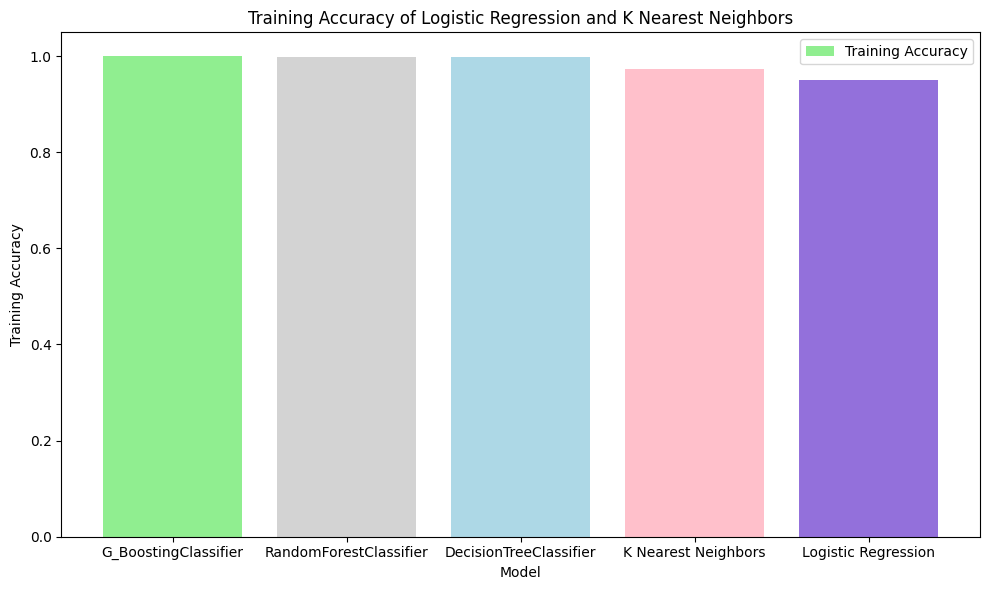

In [64]:
import matplotlib.pyplot as plt

model = pd.DataFrame({
    'Model': ['Logistic Regression', 'K Nearest Neighbors', 'DecisionTreeClassifier', 'RandomForestClassifier', 'G_BoostingClassifier'],
    'Training Accuracy': [lr_accuracy_train, knn_accuracy_train, dt_accuracy_train, rf_accuracy_train, gbc_accuracy_train ],
    'Model Accuracy Score': [lr_accuracy_train, knn_accuracy_train, dt_accuracy_train, rf_accuracy_train, gbc_accuracy_train]
})
model.sort_values(by='Training Accuracy', ascending=False, inplace=True)

# Create a new figure for the plot
fig = plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(model['Model'], model['Training Accuracy'], color=['lightgreen','lightgray','lightblue', 'pink','mediumpurple'])

# Add a legend
plt.legend(['Training Accuracy'], loc='upper right')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy of Logistic Regression and K Nearest Neighbors')

# Show the plot
plt.tight_layout()
plt.show()

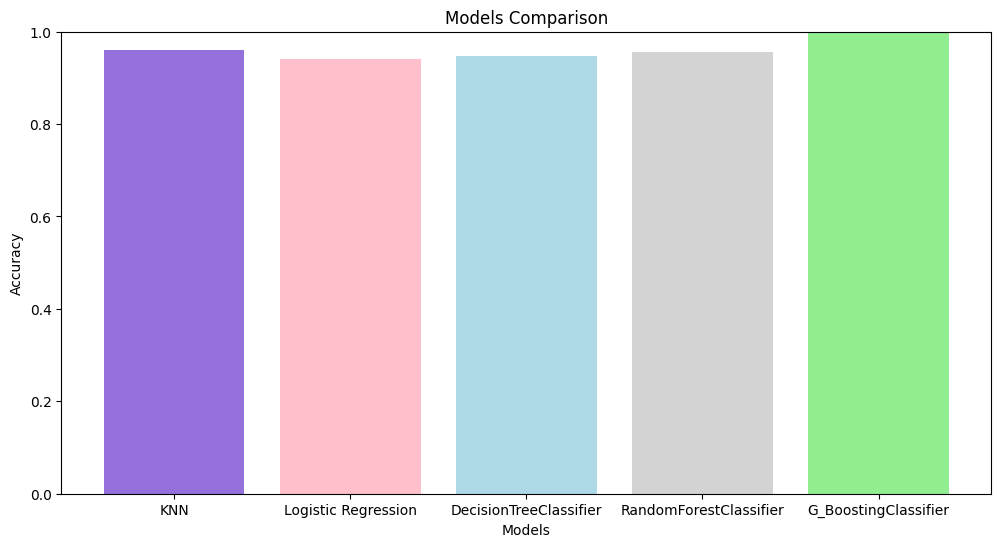



Accuracy of KNN: 0.94

Accuracy of Logistic Regression: 0.96

Accuracy of DecisionTreeClassifier: 0.95

Accuracy of RandomForestClassifier: 0.96

Accuracy of GradientBoostingClassifierB: 1.00

Accuracy of GradientBoostingClassifierB is better than Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, KNN


In [65]:
models = ['KNN', 'Logistic Regression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'G_BoostingClassifier']
accuracies = [lr_accuracy_test, knn_accuracy_test, dt_accuracy_test, rf_accuracy_test, gbc_accuracy_test]

colors = ['mediumpurple', 'pink', 'lightblue', 'lightgray', 'lightgreen']

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=colors)
plt.title('Models Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)  # Set the y-axis limit if accuracy values are between 0 and 1
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f'\n\nAccuracy of KNN: {knn_accuracy_test:.2f}\n')
print(f'Accuracy of Logistic Regression: {lr_accuracy_test:.2f}\n')
print(f'Accuracy of DecisionTreeClassifier: {dt_accuracy_test:.2f}\n')
print(f'Accuracy of RandomForestClassifier: {rf_accuracy_test:.2f}\n')
print(f'Accuracy of GradientBoostingClassifierB: {gbc_accuracy_test:.2f}\n')

if (lr_accuracy_test > knn_accuracy_test) and (lr_accuracy_test > dt_accuracy_test) and (lr_accuracy_test > rf_accuracy_test) and (lr_accuracy_test > gbc_accuracy_test):
  print('Accuracy of Logistic Regression is better than KNN, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifierB')

elif (knn_accuracy_test > lr_accuracy_test) and (knn_accuracy_test > dt_accuracy_test) and (knn_accuracy_test > rf_accuracy_test) and (knn_accuracy_test > gbc_accuracy_test):
  print('Accuracy of KNN is better than Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifierB')

elif (dt_accuracy_test > lr_accuracy_test) and (dt_accuracy_test > knn_accuracy_test) and (dt_accuracy_test > rf_accuracy_test) and (dt_accuracy_test > gbc_accuracy_test):
  print('Accuracy of DecisionTreeClassifier is better than Logistic Regression, KNN, RandomForestClassifier, GradientBoostingClassifierB')

elif (rf_accuracy_test > lr_accuracy_test) and (rf_accuracy_test > dt_accuracy_test) and (rf_accuracy_test > knn_accuracy_test) and (rf_accuracy_test > gbc_accuracy_test):
  print('Accuracy of RandomForestClassifier is better than Logistic Regression, DecisionTreeClassifier, KNN, GradientBoostingClassifierB')

elif (gbc_accuracy_test > lr_accuracy_test) and (gbc_accuracy_test > dt_accuracy_test) and (gbc_accuracy_test > rf_accuracy_test) and (gbc_accuracy_test > knn_accuracy_test):
  print('Accuracy of GradientBoostingClassifierB is better than Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, KNN')
else:
  print('All models have the same accuracy')